<a href="https://colab.research.google.com/github/jumunseong99-hue/boostcourse_assignment/blob/main/w3_4.1.4~4.1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [5]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [6]:
df = pd.read_csv("/diabetes_feature.csv")
df.shape

(768, 16)

In [7]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [9]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [10]:
y = df['Outcome']
y.shape

(768,)

In [11]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [13]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [14]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

### 최적의 max_depth 값 찾기

In [38]:
feature_names = X_train.columns.tolist()

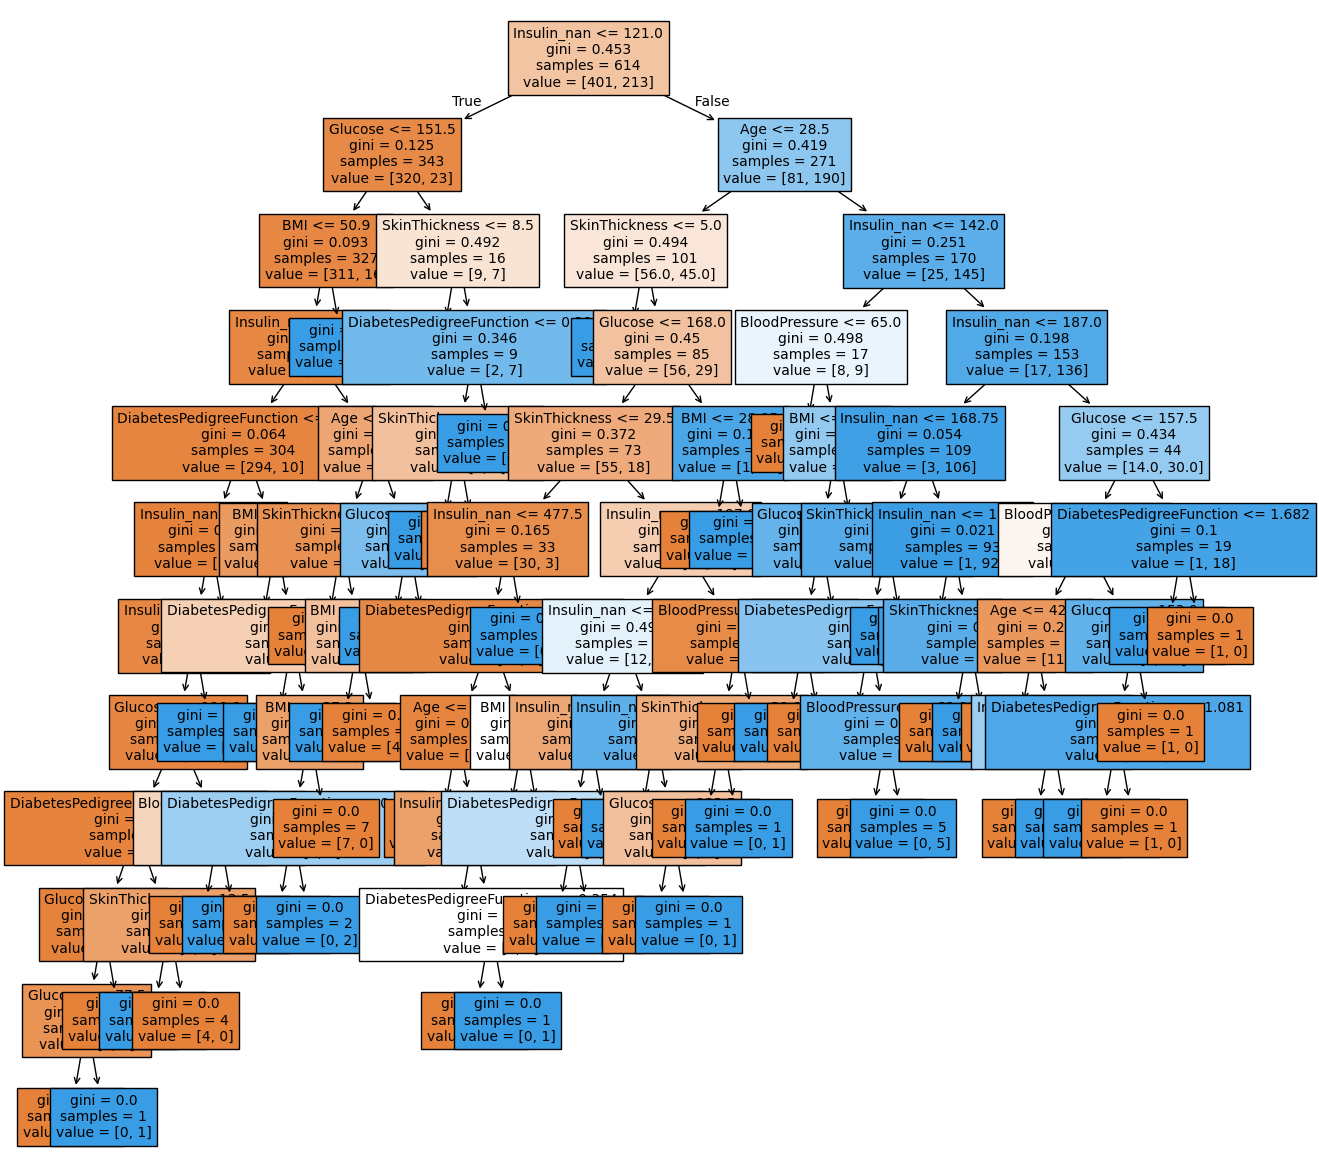

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [16]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [17]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [18]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [19]:
clf.best_score_

np.float64(0.8664934026389444)

In [20]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.008330,0.003687,0.003286,0.000091,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.007198,0.002145,0.003253,0.000111,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.007879,0.002708,0.003421,0.000398,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.008445,0.002131,0.003358,0.000080,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
17,0.006759,0.000250,0.003253,0.000037,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5


In [21]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [22]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [23]:
model

DecisionTreeClassifier(random_state=42)

In [24]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([18,  7,  4, 10, 17, 18, 13,  9,  9,  7])

In [25]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [26]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([18,  7,  4, 10, 17, 18, 13,  9,  9,  7]),
 'max_features': array([0.9225406 , 0.78044591, 0.84541125, 0.71965291, 0.78579624,
        0.70630644, 0.86517933, 0.98212397, 0.82683172, 0.81220325,
        0.77409415, 0.79801798, 0.89507978, 0.73916421, 0.89123525,
        0.81117519, 0.96935103, 0.72370218, 0.73056938, 0.80017395,
        0.83366929, 0.76050482, 0.93753425, 0.91346819, 0.93120847,
        0.98045456, 0.96019322, 0.88228069, 0.73237459, 0.84853922,
        0.91041577, 0.98135516, 0.87399707, 0.83073274, 0.88988959,
        0.9597276 , 0.73837273, 0.90430327, 0.8476306 , 0.90636371,
        0.70252511, 0.75479197, 0.85029843, 0.82223691, 0.80171364,
        0.75405684, 0.79135102, 0.72928682, 0.98367313, 0.75720075,
        0.7376594 , 0.86702978, 0.74853765, 0.86032606, 0.94730906,
        0.72759447, 0.75665398, 0.70760514, 0.81191522, 0.97014681,
        0.7728175 , 0.94974818, 0.8510797 , 0.89375415, 0.8271162 ,
        0.8947181 , 0.73104372, 0.730

In [27]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([18,  7,  4, 10, 17, 18, 13,  9,  9,  7]),
                                        'max_features': array([0.9225406 , 0.78044591, 0.84541125, 0.71965291, 0.78579624,
       0.70630644, 0.86517933, 0.98212397, 0.82683172, 0.81220325,
       0.77409415, 0.79801798, 0.89507978, 0.73916421, 0.89123525,
       0...
       0.78277277, 0.84882927, 0.98128491, 0.94735296, 0.87006834,
       0.74225619, 0.75686245, 0.97578138, 0.95002856, 0.80819792,
       0.85697049, 0.79758403, 0.83004306, 0.79835044, 0.83979263,
       0.75248543, 0.89983499, 0.82655281, 0.92710867, 0.77843346,
       0.77857133, 0.92137612, 0.83774992, 0.95735307, 0.70408869,
       0.81882909, 0.90031232, 0.70840131, 0.94565989, 0.92247055]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [28]:
clf.best_params_

{'min_samples_split': 4,
 'max_features': np.float64(0.8377499186868448),
 'max_depth': np.int64(10)}

In [29]:
clf.best_score_

np.float64(0.8713847794215648)

In [30]:
clf.score(X_test, y_test)

0.8571428571428571

In [31]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
601,0.007795,0.000237,0.003755,0.000278,6,0.970147,9,"{'min_samples_split': 6, 'max_features': 0.970...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
612,0.009666,0.004063,0.004055,0.000472,4,0.873997,10,"{'min_samples_split': 4, 'max_features': 0.873...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
963,0.016650,0.001513,0.007598,0.000789,4,0.798018,10,"{'min_samples_split': 4, 'max_features': 0.798...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
964,0.009745,0.002458,0.004611,0.001815,6,0.931208,9,"{'min_samples_split': 6, 'max_features': 0.931...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
926,0.044753,0.021482,0.019191,0.009550,6,0.950029,9,"{'min_samples_split': 6, 'max_features': 0.950...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1


## 학습과 예측하기

In [32]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
feature_names = X_train.columns.tolist()

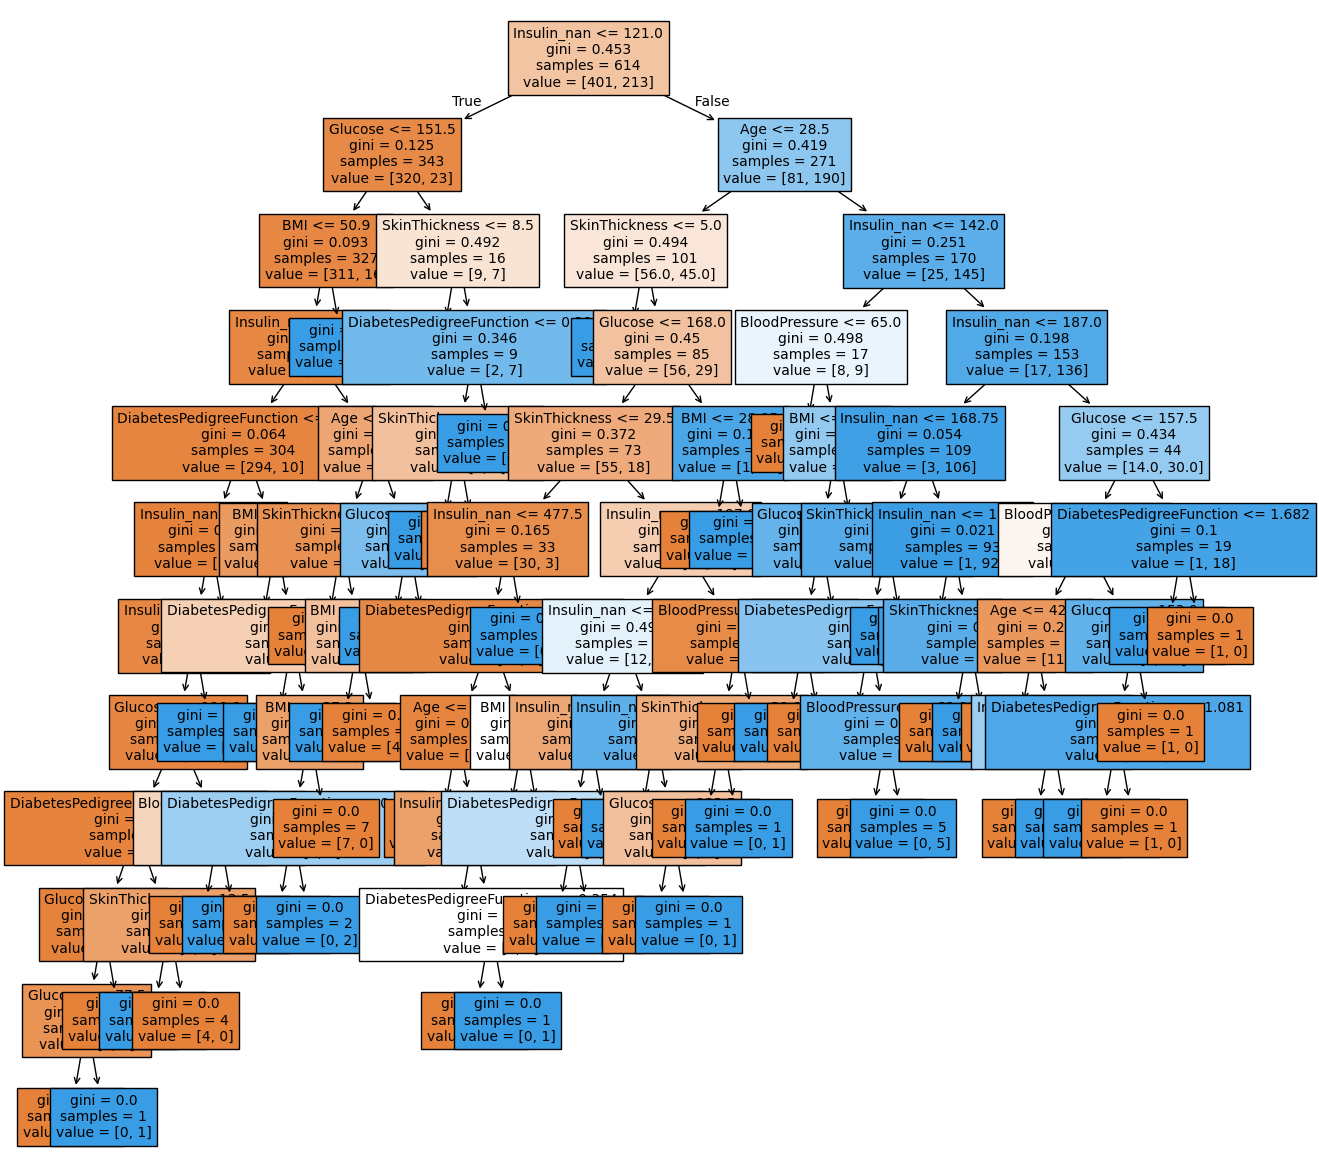

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [35]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [36]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

np.int64(28)

In [37]:
# accuracy score를 구합니다.

accuracy_score(y_test, y_predict) * 100

81.81818181818183